Pretty straightforward script of just comparing distances in histogram 823.

First I will make the trajectory for the sugar. I then convert with gromacs so that they are pdb files for PyMol

In [45]:
import MDAnalysis as mda
from MDAnalysis.analysis import align, rms
import numpy as np
import matplotlib.pyplot as plt
from plot_parameters_for_paper import *
plotting_params()
import pandas as pd
import seaborn as sns


In [2]:
clust_ID = np.loadtxt(f"../textfiles_out/gmx_cluster_files/histogram_823/clust-id.xvg")[:,1]

good_frames = np.where(clust_ID == 1.0)

histo_sim = mda.Universe('../confout_files/tpr_files/influx_BFRU_gate_CV.protonly.tpr',\
                         '../confout_files/FES_grids_confouts/influx_BFRU_gate_CV/histogram_823/FES_grid_all.protonly.cluster.fit.xtc')
ref = mda.Universe('../confout_files/FES_grids_confouts/influx_BFRU_gate_CV/histogram_823/FES_grid_all.start.pdb')

/home/semccomas/anaconda3/envs/string_method/lib/python3.8/site-packages/MDAnalysis/topology/PDBParser.py:317: UserWarning: Element information is missing, elements attribute will not be populated. If needed these can be guessed using MDAnalysis.topology.guessers.
  warnings.warn("Element information is missing, elements attribute "


In [3]:
write_sys = False

In [4]:
system = histo_sim.select_atoms('not resid 474')
outdir = '../textfiles_out/gmx_cluster_files/histogram_823'

if write_sys:
    with mda.Writer(f'{outdir}/top_cluster_all_poses.xtc', system.n_atoms) as W:
        for ts in histo_sim.trajectory:
            if np.any(np.array(good_frames) == ts.frame):
                print(ts.frame)
                W.write(system)

# getting distances

In [5]:
import MDAnalysis.analysis.distances as d

indir = '../textfiles_out/gmx_cluster_files/histogram_823'
histo_823 = mda.Universe(f'{indir}/no_resid_474.pdb',\
                         f'{indir}/top_cluster_all_poses.xtc')



/home/semccomas/anaconda3/envs/string_method/lib/python3.8/site-packages/MDAnalysis/topology/PDBParser.py:403: UserWarning: PDB file contained CONECT record to TER entry. These are not included in bonds.
  warnings.warn(


In [46]:
dists_d = {}

res_l = [166, 293, 324, 391]
#bfru = histo_823.select_atoms('resname BFRU')
title_d = {166:'Q166-OH1', 293:'N293-OH4',  324:'N324-OH6', 391:'S391-OH1'}
bfru_sel = {293:'and name O4 HO4', 166: 'and name O1 HO1', 391:'and name O1 HO1', 324:'and name O6 HO6'}

for res in res_l:
    binding_res = histo_823.select_atoms(f'resid {res-6}')
    bfru = histo_823.select_atoms(f'resname BFRU {bfru_sel[res]}')
    print(binding_res.resnames[0], binding_res.resids[0]+6)
    dists = []
    for ts in histo_823.trajectory:
        temp = np.min(d.distance_array(binding_res.positions, bfru.positions))
        dists.append(temp)

    #dists_d[res] = [np.mean(np.array(dists)), np.std(np.array(dists))]
    dists_d[title_d[res]] = np.array(dists)

GLN 166
ASN 293
ASN 324
SER 391


In [47]:
dists_d

{'Q166-OH1': array([2.1058252 , 2.08877879, 2.30150144, 2.23957914, 2.00594241,
        2.3570312 , 2.19804285, 2.05798328, 2.02713947, 1.7549927 ,
        1.97101407, 1.9923342 , 1.87919936, 2.02203039, 2.20771485,
        2.13815124, 2.26492993, 2.08564619, 2.10244988, 1.8278138 ,
        2.03511341, 2.12542072, 2.09680415, 1.97192264, 1.93132261,
        1.88862438, 2.27967398, 1.92825925, 2.09131576, 2.05129161,
        1.94141689, 1.91929944, 1.99664725, 2.25526308, 2.61818634,
        1.95885416, 1.86556026, 2.00414546, 1.89899881, 1.88234041,
        2.00833266, 2.0689173 , 2.21767987, 2.00394685, 1.97939405,
        2.365798  , 1.95325528, 2.4483655 , 2.02901814, 2.23173056,
        1.89118858, 1.86209564, 1.79089246, 2.25818603, 2.08684042,
        1.89552526, 2.25230947, 1.92429276, 1.97741774, 1.91648336,
        2.13574077, 2.28831542, 2.55890624, 1.78871327, 1.91200931,
        1.92507269, 1.80748291, 1.96483468, 1.96196542, 1.89507419,
        2.12172119, 2.11529927, 2.35

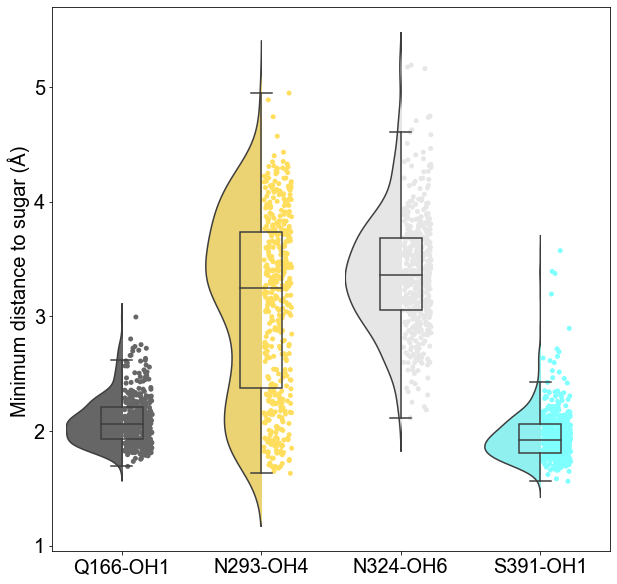

In [73]:
fig,ax = plt.subplots(1,1,figsize = (10,10))
color_l = ['#666666','#FFDE5E', '#E6E6E6', '#80FFFF']
df = pd.DataFrame(dists_d)

p2 = sns.violinplot(data=df, palette = color_l, inner = None, scale = 'width')
for violin in p2.collections:
    bbox = violin.get_paths()[0].get_extents()
    x0, y0, width, height = bbox.bounds
    violin.set_clip_path(plt.Rectangle((x0, y0), width / 2, height, transform=ax.transData))

sns.boxplot(data = df, saturation=1, showfliers=False,
            width=0.3, boxprops={'zorder': 3, 'facecolor': 'none'}, ax=ax, zorder =3)
old_len_collections = len(p2.collections)


sns.stripplot(data=df, dodge=False, ax=ax, palette = color_l)

for dots in ax.collections[old_len_collections:]:
    dots.set_offsets(dots.get_offsets() + np.array([0.12, 0]))

xlim = ax.get_xlim()
ylim = ax.get_ylim()

ax.set_ylabel('Minimum distance to sugar (Å) ')
plt.savefig('../images_figs/confout_file_analysis/sugar_coordination/histo_823_dists.svg', dpi = 1000)

# previous method

KeyError: 'Q166-OH1'

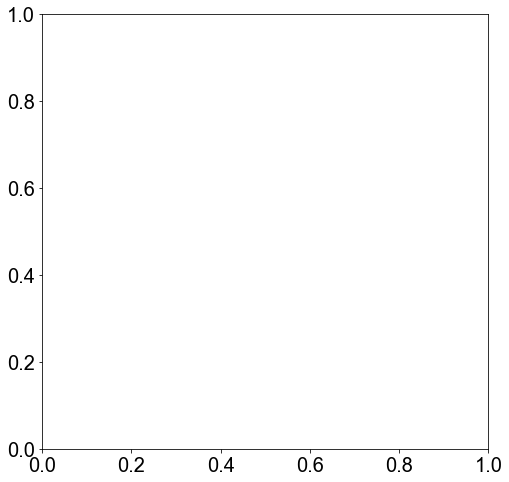

In [48]:
fig,ax = plt.subplots(1,1,figsize = (8,8))

colors_d = {293:'#FFDE5E', 166:'#666666', 391:'#80FFFF', 324:'#E6E6E6'}
scale = 23000

for n,k in enumerate(dists_d.keys()):
    ax.scatter(n, dists_d[k][0], color = colors_d[k], s = 500)
    #ax.scatter(n, dists_d[k][0], color = colors_d[k], s = dists_d[k][1]*scale, alpha = 0.3, edgecolor = 'black')
    #ax.errorbar(n, dists_d[k][0], yerr=dists_d[k][1], color = colors_d[k], linewidth = 5, capsize = 10)


ax.set_xlim(-0.5, 3.5)
ax.set_ylim(1.5, 4)

labels = [item.get_text() for item in ax.get_xticklabels()]
ax.set_xticks([0,1,2,3])
ax.set_xticklabels(['Q166 - C1', 'N293 - C4', 'N324 - C6', 'S391 - C1'])
ax.set_ylabel('Minimum residue distance to OH group (A)')
plt.savefig('../images_figs/confout_file_analysis/sugar_coordination/histo_823_dists.png')